# Analysis of Accidents Reported on Twitter 
### By **Néstor Suat** in 2021

**Descripción:** Explorando los datos recolectados en twitter sobre reportes de accidentes

### Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot') or plt.style.use('ggplot')

## Dataset

In [2]:
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
file = 'accident_tweets_lat_lon_3_months_bogota.tsv'

dataset = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
df = dataset[(dataset['created_at'] >= '2018-10-01') & (dataset['created_at'] < '2018-11-01')]
geodata = df[['lat','lon']]
geodata.head(5)

lat        lon
0  4.664445 -74.053855
1  4.664445 -74.053855
2  4.613574 -74.092709
3  4.613574 -74.092709
4  4.743242 -74.038825

In [3]:
geodata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 0 to 4177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     4178 non-null   float64
 1   lon     4178 non-null   float64
dtypes: float64(2)
memory usage: 97.9 KB


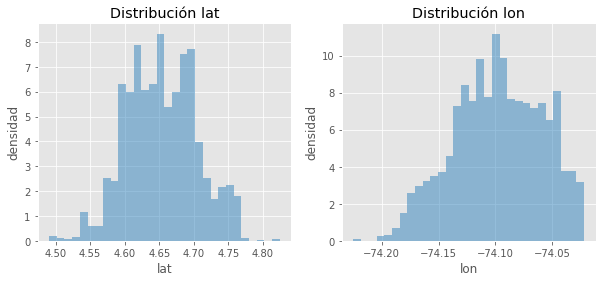

In [4]:
# Histograma de cada variable
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

axs[0].hist(geodata.lat, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[0].set_title('Distribución lat')
axs[0].set_xlabel('lat')
axs[0].set_ylabel('densidad')

axs[1].hist(geodata.lon, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[1].set_title('Distribución lon')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('densidad');



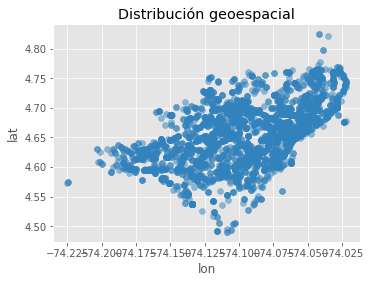

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))
ax.scatter(geodata.lon, geodata.lat, color="#3182bd", alpha=0.5)
ax.set_title('Distribución geoespacial')
ax.set_xlabel('lon')
ax.set_ylabel('lat');

## Kernel Denisty Estimation

In [6]:
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [42]:
bandwidths = np.linspace(0.00001, 0.0001, 100)
bandwidths

array([1.00000000e-05, 1.09090909e-05, 1.18181818e-05, 1.27272727e-05,
       1.36363636e-05, 1.45454545e-05, 1.54545455e-05, 1.63636364e-05,
       1.72727273e-05, 1.81818182e-05, 1.90909091e-05, 2.00000000e-05,
       2.09090909e-05, 2.18181818e-05, 2.27272727e-05, 2.36363636e-05,
       2.45454545e-05, 2.54545455e-05, 2.63636364e-05, 2.72727273e-05,
       2.81818182e-05, 2.90909091e-05, 3.00000000e-05, 3.09090909e-05,
       3.18181818e-05, 3.27272727e-05, 3.36363636e-05, 3.45454545e-05,
       3.54545455e-05, 3.63636364e-05, 3.72727273e-05, 3.81818182e-05,
       3.90909091e-05, 4.00000000e-05, 4.09090909e-05, 4.18181818e-05,
       4.27272727e-05, 4.36363636e-05, 4.45454545e-05, 4.54545455e-05,
       4.63636364e-05, 4.72727273e-05, 4.81818182e-05, 4.90909091e-05,
       5.00000000e-05, 5.09090909e-05, 5.18181818e-05, 5.27272727e-05,
       5.36363636e-05, 5.45454545e-05, 5.54545455e-05, 5.63636364e-05,
       5.72727273e-05, 5.81818182e-05, 5.90909091e-05, 6.00000000e-05,
      

In [23]:
np.linspace(0.0001, 0.001, 10)

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])

In [14]:
latlon = np.vstack([geodata['lat'],
                    geodata['lon']]).T
latlon

array([[  4.6644446 , -74.053855  ],
       [  4.6644446 , -74.053855  ],
       [  4.61357357, -74.09270913],
       ...,
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ]])

In [28]:
np.radians(latlon).shape

(14572, 2)

In [43]:
# Validación cruzada para identificar kernel y bandwidth
# ==============================================================================

param_grid = {'kernel': ['gaussian', 'epanechnikov', 'exponential', 'linear'],
              'bandwidth' : bandwidths
             }

grid = GridSearchCV(
        estimator  = KernelDensity(),
        param_grid = param_grid,
        n_jobs     = -1,
        cv         = 10,
        verbose    = 2
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = np.radians(latlon))

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


/home/hat/.local/share/virtualenvs/traffic-accidents-cSXE967c/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [3918.75845561          -inf 5392.3435919           -inf 4150.43076821
          -inf 5391.85182376          -inf 4404.45686557          -inf
 5388.219116            -inf 4537.207915            -inf 5382.45719247
          -inf 4690.01817342          -inf 5375.25873489          -inf
 4759.63796483          -inf 5367.10647811          -inf 4828.43560837
          -inf 5358.34153435          -inf 4888.92929078          -inf
 5349.20744244          -inf 4938.91811143          -inf 5339.87931001
          -inf 4983.54151738          -inf 5330.48353353          -inf
 5022.77529588          -inf 5321.11140611          -inf 5043.50972619
          -inf 5311.82866366          -inf 5066.27183263          -inf
 5302.68227963          -inf 5080.53836449          -inf 5293.70535705
          -inf 5094.42309447 

GridSearchCV(cv=10, estimator=KernelDensity(), n_jobs=-1,
             param_grid={'bandwidth': array([1.00000000e-05, 1.09090909e-05, 1.18181818e-05, 1.27272727e-05,
       1.36363636e-05, 1.45454545e-05, 1.54545455e-05, 1.63636364e-05,
       1.72727273e-05, 1.81818182e-05, 1.90909091e-05, 2.00000000e-05,
       2.09090909e-05, 2.18181818e-05, 2.27272727e-05, 2.36363636e-05,
       2.45454545e-05, 2.5454545...
       8.27272727e-05, 8.36363636e-05, 8.45454545e-05, 8.54545455e-05,
       8.63636364e-05, 8.72727273e-05, 8.81818182e-05, 8.90909091e-05,
       9.00000000e-05, 9.09090909e-05, 9.18181818e-05, 9.27272727e-05,
       9.36363636e-05, 9.45454545e-05, 9.54545455e-05, 9.63636364e-05,
       9.72727273e-05, 9.81818182e-05, 9.90909091e-05, 1.00000000e-04]),
                         'kernel': ['gaussian', 'epanechnikov', 'exponential',
                                    'linear']},
             verbose=2)

In [44]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_kde_final = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 1e-05, 'kernel': 'exponential'} : 5392.343591897259 None


In [64]:
kde = KernelDensity(bandwidth=0.0003, kernel='epanechnikov')
kde.fit(X = np.radians(latlon))

KernelDensity(bandwidth=0.0003, kernel='epanechnikov')

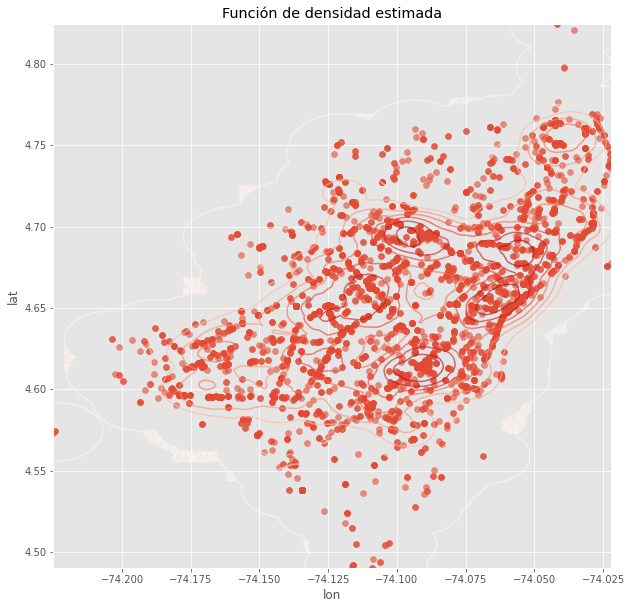

In [65]:
# Mapa de densidad de probabilidad
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Grid de valores dentro del rango observado (2 dimensiones)
x = np.linspace(min(geodata.lon), max(geodata.lon), 800)
y = np.linspace(min(geodata.lat), max(geodata.lat), 800)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack((yy.flatten(), xx.flatten()))

# Densidad de probabilidad de cada valor del grid
#log_densidad_pred = modelo_kde_final.score_samples(np.radians(grid))
#densidad_pred = np.exp(log_densidad_pred)

log_densidad_pred = kde.score_samples(np.radians(grid))
densidad_pred = np.exp(log_densidad_pred)

ax.scatter(geodata.lon, geodata.lat, alpha=0.6)
ax.contour(
    xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.6,
    cmap="Reds"
)
ax.set_title('Función de densidad estimada')
ax.set_xlabel('lon')
ax.set_ylabel('lat');


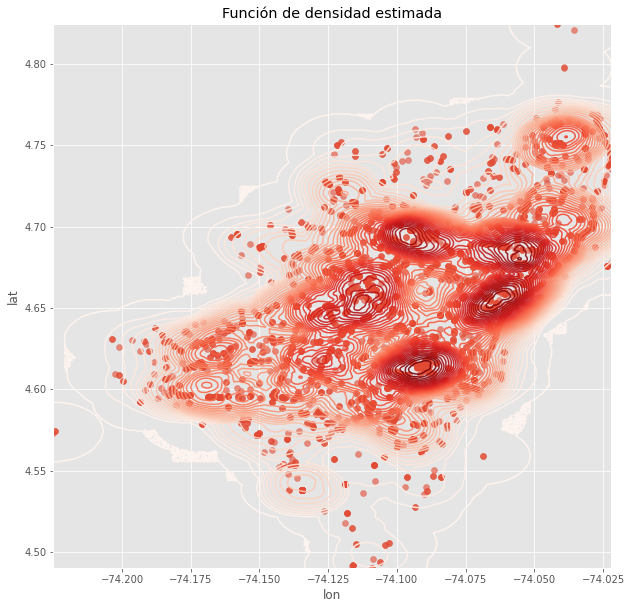

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.scatter(geodata.lon, geodata.lat, alpha=0.6)
zz = densidad_pred.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 40)
ax.contour(
    xx, yy, zz, levels,
    alpha=0.9,
    cmap="Reds",    
)
ax.set_title('Función de densidad estimada')
ax.set_xlabel('lon')
ax.set_ylabel('lat');

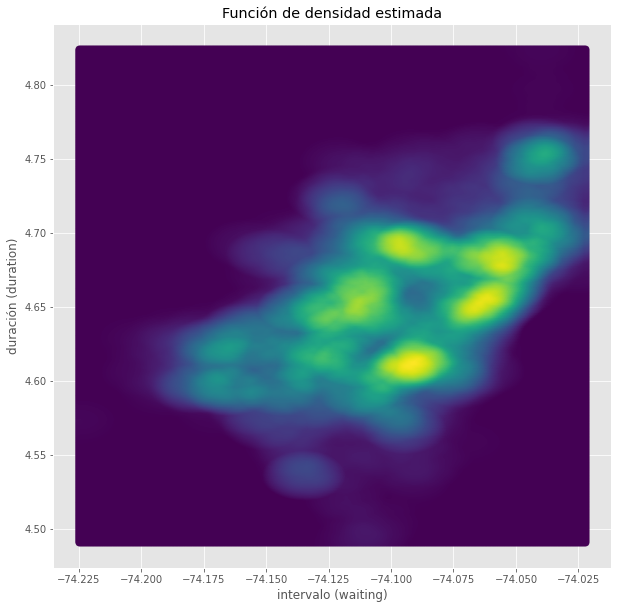

In [67]:
# Representación como mapa de calor
#===============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.scatter(grid[:,1], grid[:,0], alpha=0.6, c=densidad_pred)
ax.set_title('Función de densidad estimada')
ax.set_xlabel('intervalo (waiting)')
ax.set_ylabel('duración (duration)');

In [72]:
from mpl_toolkits.mplot3d import axes3d
plt.style.use('default')
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
#ax.view_init(60, 35)
ax.plot_surface(xx, yy, densidad_pred.reshape(xx.shape), cmap='viridis')
ax.set_xlabel('intervalo (waiting)')
ax.set_ylabel('duración (duration)')
ax.set_zlabel('densidad')
ax.set_title('Superficie 3D densidad')
plt.show()
plt.style.use('ggplot');

ImportError: cannot import name '_axis_method_wrapper' from 'matplotlib.axes._base' (/home/hat/.local/share/virtualenvs/traffic-accidents-cSXE967c/lib/python3.8/site-packages/matplotlib/axes/_base.py)

In [66]:
import mpl_toolkits


In [1]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids

xgrid, ygrid = construct_grids(data)

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'